In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.io as sio
import sys
sys.path.append('..')

from helper import  kmeans as km

dict_keys(['__header__', '__version__', '__globals__', 'X'])
         X1        X2
0  1.842080  4.607572
1  5.658583  4.799964
2  6.352579  3.290854
3  2.904017  4.612204
4  3.231979  4.939894


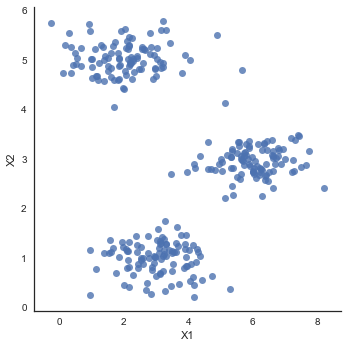

In [6]:
mat = sio.loadmat('./data/ex7data2.mat')
print(mat.keys())
data2 = pd.DataFrame(mat['X'], columns=['X1','X2'])
print(data2.head())

sns.set(context='notebook', style='white')
sns.lmplot('X1','X2', data=data2, fit_reg=False)

# 0.random init
fot init centriods

In [7]:
km.random_init(data2, 3)

array([[ 4.16911897,  0.20581038],
       [ 3.08970176,  1.08814448],
       [ 7.24694794,  2.96877424]])

# 1. cluster assignment
http://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point

### find closest cluster experiment

In [11]:
init_centroids = km.random_init(data2, 3)
init_centroids

array([[ 5.87177181,  3.2551773 ],
       [ 1.84419981,  5.03153948],
       [ 1.20099981,  4.57829763]])

In [12]:
x = np.array([1, 1])

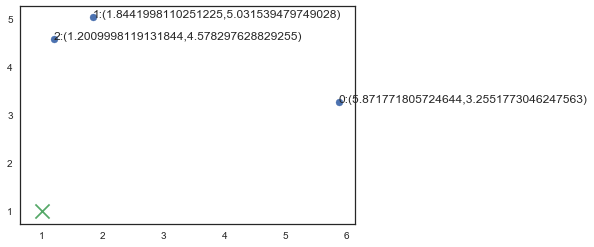

In [13]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x=init_centroids[:,0], y=init_centroids[:,1])

for i, node in enumerate(init_centroids):
    ax.annotate('{}:({},{})'.format(i, node[0],node[1]),node)
    
ax.scatter(x[0], x[1], marker='x', s=200)

In [14]:
km._find_your_cluster(x, init_centroids)

2

### 1 epoch cluster assigning

In [17]:
C = km.assign_cluster(data2, init_centroids)
data_with_c = km.combine_data_C(data2,C)
data_with_c

X1        X2  C
0    1.842080  4.607572  1
1    5.658583  4.799964  0
2    6.352579  3.290854  0
3    2.904017  4.612204  1
4    3.231979  4.939894  1
5    1.247923  4.932678  2
6    1.976199  4.434897  1
7    2.234541  5.055472  1
8    2.983408  4.840464  1
9    2.979704  4.806711  1
10   2.114964  5.373736  1
11   2.121695  5.208542  1
12   1.514353  4.770033  2
13   2.169792  5.274354  1
14   0.418524  4.883125  2
15   2.470537  4.804189  1
16   4.060691  4.995039  1
17   3.007089  4.678978  1
18   0.666323  4.871879  2
19   3.162187  4.836583  1
20   0.511553  4.910529  2
21   3.134280  4.961781  1
22   2.049746  5.624139  1
23   0.665828  5.243993  2
24   1.017320  4.844736  2
25   2.178936  5.297587  1
26   2.859626  5.260420  1
27   1.308826  5.301587  1
28   0.992532  5.015674  2
29   1.403726  4.575277  2
..        ...       ... ..
270  6.273763  2.242560  0
271  5.052745  2.756922  0
272  6.885756  2.888453  0
273  4.187744  2.892835  0
274  5.975103  3.025919  0
275  6.094571  2.618680  0
276  5.723957  3.044542  0
277  4.372498  3.054882  0
278  6.292063  2.775739  0
279  5.145330  4.132257  0
280  6.587057  3.375083  0
281  5.787691  3.292551  0
282  6.727981  3.004398  0
283  6.640789  2.410688  0
284  6.232289  2.728509  0
285  6.217727  2.809946  0
286  5.781163  3.079878  0
287  6.624473  2.744537  0
288  5.195908  3.069729  0
289  5.871772  3.255177  0
290  5.895621  2.898440  0
291  5.617543  2.597507  0
292  5.631761  3.047587  0
293  5.502587  3.118691  0
294  6.482126  2.550851  0
295  7.302787  3.380160  0
296  6.991984  2.987067  0
297  4.825534  2.779617  0
298  6.117681  2.854757  0
299  0.940489  5.715568  1

[300 rows x 3 columns]

See the first round clustering result

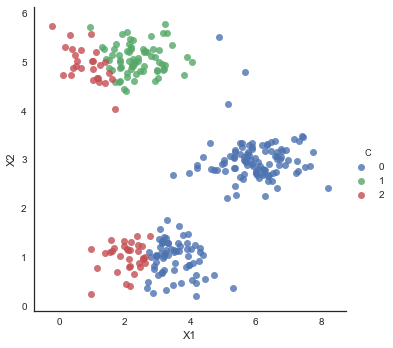

In [18]:
sns.lmplot('X1','X2',hue='C',data=data_with_c,fit_reg=False)

# 2.calculate new centroid

In [19]:
km.new_centroids(data2, C)

array([[ 5.00867252,  2.19319209],
       [ 2.37480976,  5.05540828],
       [ 1.50392543,  2.77577979]])

# putting all together, take1
this is just 1 shot `k-means`, if the random init pick the bad starting centroids, the final clustering may be very sub-optimal

In [29]:
#epoch 默认是100次
final_C, final_centroid, _ = km._k_means_iter(data2,3) #epoch 默认是100次
data_with_c = km.combine_data_C(data2, final_C)

running epoch 0
running epoch 1
running epoch 2
running epoch 3


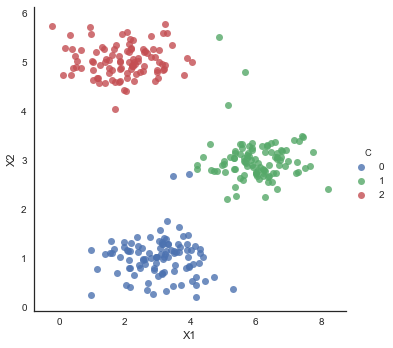

In [26]:
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)

# calculate the cost

In [30]:
km.cost(data2, final_centroid, final_C)

0.79417636337158704

# k-mean with multiple tries of randome init, pick the best one with least cost

In [33]:
best_C, best_centroids, least_cost = km.k_means(data2, 3)

running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5


In [34]:
least_cost

0.79417636337158704

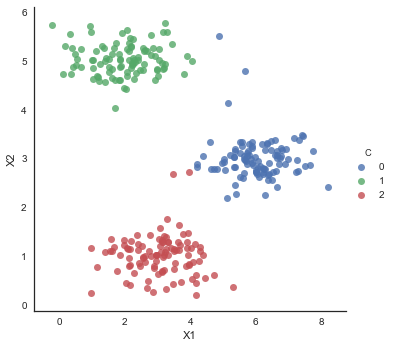

In [36]:
data_with_c = km.combine_data_C(data2, best_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)

# try sklearn kmeans

In [38]:
from sklearn.cluster import KMeans
sk_kmans = KMeans(n_clusters=3)
sk_kmans.fit(data2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
sk_C = sk_kmans.predict(data2)

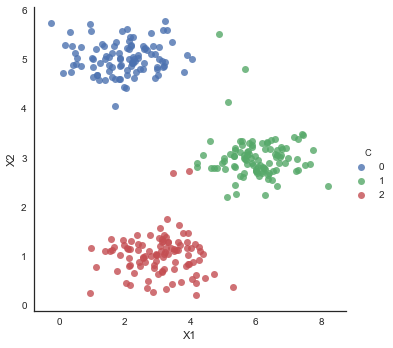

In [40]:
data_with_c = km.combine_data_C(data2,sk_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)